<H1> Content based filtering</H1>
<H3> Iris Bakker en Bart van den Broek</H3>

<H2>Import and load data</H2>

In [12]:
from pandas import Series, Timestamp
import pandas as pd
from pandas import DataFrame
import numpy as np
import simplejson as json
import matplotlib.pyplot as plt

In [13]:
def load_jsons(data_path, file):
    """ helper function to load '.json' files (they're not proper jsons) """
    file_path = data_path + file
    with open(file_path) as jsons:
        lines = [json.loads(json_line) for json_line in jsons]
    return pd.DataFrame(lines)

<H2> Load json files as Df</H2>

In [14]:
# Load data for town called Ambridge
data_path = '../data/ambridge/'

# Seperate the files 
review_file = 'review.json'
business_file = 'business.json'
user_file = 'user.json'
tip_file = 'tip.json'
checkin_file = 'checkin.json'

reviews = load_jsons(data_path, review_file)
businesses = load_jsons(data_path, business_file)
users = load_jsons(data_path, user_file)
tips = load_jsons(data_path, tip_file)
checkins = load_jsons(data_path, checkin_file)

<H3> Display dataframe with useful columns</H3>

In [16]:
# Displays the reviews, high star ratings first
highest_stars = (reviews.sort_values(by='stars', ascending=False))
display(highest_stars)

# Displays the columns we will actually need in this assignment
cat = highest_stars[['user_id','business_id', 'stars', 'review_id']]
cat['categories'] = businesses['categories']
display(cat)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,qb2EVdmVNvw3D0kBMN6Xrg,hXydWH25S92HjI5hmWRSyA,dJ0R-XT78LUQeNHQkD-G9g,5.0,0,0,0,Best place to get ice cream. They have only tw...,2018-08-14 04:03:02
206,js_s0o390gbWyuLomlJifw,g08bkzhvjsST-0g2TfEg7Q,N92Pbr2ygKDLkjmr-4BAPw,5.0,0,0,0,This place was a gem. The turkey chili was phe...,2017-04-07 16:42:39
220,YuLDKmcoYoDOFPgAWm9L1A,wFFLWorAWh3hpxVLQP8YWw,N92Pbr2ygKDLkjmr-4BAPw,5.0,0,0,0,"FINALLY... you don't have to go to the ""South...",2015-08-19 01:00:46
219,7GycrjM2XnmWnpSEFhOTTA,sy_uis3d_sgIGodPZktQcQ,N92Pbr2ygKDLkjmr-4BAPw,5.0,1,0,0,My boyfriend and I went here tonight for dinne...,2017-06-17 01:15:26
216,8odAO3gLebrJsJKi7VaWHA,QNecf-DovpR9IVq1z1YJbw,N92Pbr2ygKDLkjmr-4BAPw,5.0,0,0,0,We ran into this place on a whim and I am so g...,2015-11-16 22:48:03
...,...,...,...,...,...,...,...,...,...
172,D8TncjqEjGfcKTeBMomJag,gB8hGkSEUT5n6VPGHXYjbA,pcbVl6ZHDOJHsnetY0rJEQ,1.0,3,2,0,We attended a wedding here and was never so in...,2012-06-13 16:27:20
89,PlMDL03wlb59DW0C34hvdg,NOR93THAvtPUrJlzP9a3pA,ftx72aqADrNYmOlMytdtCg,1.0,0,0,0,You have not only lied but undermined the purp...,2018-06-19 16:44:14
243,MWagIb1mqD80k1_G8GDZ2g,1gJw6DxTrf0Zmp9gDgYlrQ,LHd0Y_0tIWWPvRqDb2b74Q,1.0,0,0,1,This place is a joke I can't believe they're s...,2017-11-03 07:14:19
168,6h88DqBbwtJRhbeGOj4lvQ,Uz51g_KgDx7nHyHD2OXZLA,EZ9zSk4ld27LwgfANoF4VA,1.0,2,1,0,Poor service and highly priced and when you fi...,2016-04-28 21:27:41


C:\Users\irisb\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,user_id,business_id,stars,review_id,categories
0,hXydWH25S92HjI5hmWRSyA,dJ0R-XT78LUQeNHQkD-G9g,5.0,qb2EVdmVNvw3D0kBMN6Xrg,"Food, Ice Cream & Frozen Yogurt"
206,g08bkzhvjsST-0g2TfEg7Q,N92Pbr2ygKDLkjmr-4BAPw,5.0,js_s0o390gbWyuLomlJifw,NaN
220,wFFLWorAWh3hpxVLQP8YWw,N92Pbr2ygKDLkjmr-4BAPw,5.0,YuLDKmcoYoDOFPgAWm9L1A,NaN
219,sy_uis3d_sgIGodPZktQcQ,N92Pbr2ygKDLkjmr-4BAPw,5.0,7GycrjM2XnmWnpSEFhOTTA,NaN
216,QNecf-DovpR9IVq1z1YJbw,N92Pbr2ygKDLkjmr-4BAPw,5.0,8odAO3gLebrJsJKi7VaWHA,NaN
...,...,...,...,...,...
172,gB8hGkSEUT5n6VPGHXYjbA,pcbVl6ZHDOJHsnetY0rJEQ,1.0,D8TncjqEjGfcKTeBMomJag,NaN
89,NOR93THAvtPUrJlzP9a3pA,ftx72aqADrNYmOlMytdtCg,1.0,PlMDL03wlb59DW0C34hvdg,NaN
243,1gJw6DxTrf0Zmp9gDgYlrQ,LHd0Y_0tIWWPvRqDb2b74Q,1.0,MWagIb1mqD80k1_G8GDZ2g,NaN
168,Uz51g_KgDx7nHyHD2OXZLA,EZ9zSk4ld27LwgfANoF4VA,1.0,6h88DqBbwtJRhbeGOj4lvQ,NaN


<H1>HALLO</H1>
Vanaf hier wil ik dus eigenlijk verder gaan met het dataframe 'cat' en het volgende doen:

1. Cats namaken maar dan gebaseerd op één gebruiker 
2. Je kijkt naar de hoogste stars van de gebruiker, deze selecteer je (bijvoorbeeld alles van 3 t/m 5 stars)
3. Je kijkt naar welke categorieën bij deze hoogste stars horen
4. Deze categorieën vergelijk je met anderen (similarity dus)
5. Je koppelt de categorie die waarschijnlijk leuk gevonden wordt terug aan een bedrijf
6. Je raadt de gebruiker het bedrijf aan 


<H1>VOORBEELD</H1>
Iris heeft 3 reviews gegeven en we willen weten of restaurant ABC iets voor haar is 

1. In Iris tabel zien we dat de hoogste reviews zijn gegeven in CATS(4 stars) en in DOGS(5 stars)
2. Restaurant CATS heeft de categorie kindvriendelijk restaurant DOGS heeft de categorie ijsjes
3. Kindvriendelijk en ijsjes krijgen allebei een hoge rating en zijn dus similar
4. Restaurant ABC heeft als categorie ijsjes 
5. Restaurant ABC wordt aangeraden aan Iris, omdat ijsjes eerder een categorie was met een hoge rating

Dit kun je natuurlijk uitbreiden naar andere gebruikers erin betrekken, die dezelfde categorieën als Iris hoge ratings geven en ook meer bedrijven hebben uitgetest.

<H1> KLOPT DIT OF IS DIT NIET CONTENT BASED?!?! </H1>


In [17]:
"""
All these functions were taken and modified from module 3
"""

def extract_categories(businesses):
    categories = businesses.apply(lambda row: pd.Series([row['categories']] + row['business_id'].lower().split(",")), axis=1)
    stack_categories = categories.set_index(0).stack()
    df_stack_categories = stack_categories.to_frame()
    df_stack_categories['business_id'] = stack_categories.index.droplevel(1)
    df_stack_categories.columns = ['category', 'business_id']
    return df_stack_categories.reset_index()[['business_id', 'category']]

def pivot_categories(df):
    """Create a one-hot encoded matrix for categories.
    
    Arguments:
    df -- a dataFrame containing at least the columns 'businessId' and 'category'
    
    Output:
    a matrix containing '0' or '1' in each cell.
    1: the business has the category
    0: the business does not have the category
    """
    return df.pivot_table(index = 'business_id', columns = 'category', aggfunc = 'size', fill_value=0)

def create_similarity_matrix_jaccard(matrix):
    m11 = matrix @ matrix.T
    m10 = pd.DataFrame(matrix.sum(axis = 1).values + np.zeros(m11.shape), index = m11.index, columns = m11.index)
    m01 = m10.T
    return m11/(m01 + m10 - m11)

categories = extract_categories(businesses)
df_utility_categories = pivot_categories(categories)
similarity_matrix_categories = create_similarity_matrix_jaccard(df_utility_categories)

In [18]:
# Shows 1 when category is given to the business, 0 if not
display(pivot_categories(categories.head()))

category,3gl18exylqutlzqb6tmb0w,dj0r-xt78luqenhqkd-g9g,eu_zptrnvaxkpdsxf7cj2w,q_0egl-aelqhkukhvmldwa,yjf0i2j9q52dyit8uvgt3g
business_id,,,,,
"Auto Repair, Smog Check Stations, Tires, Automotive",1,0,0,0,0
"Breakfast & Brunch, Restaurants, American (Traditional)",0,0,1,0,0
"Filipino, Food, Restaurants, Barbeque, Smokehouse",0,0,0,1,0
"Florists, Flowers & Gifts, Shopping",0,0,0,0,1
"Food, Ice Cream & Frozen Yogurt",0,1,0,0,0


In [19]:
display(similarity_matrix_categories.head())

business_id,"American (Traditional), Music Venues, Nightlife, Restaurants, Bars, Sports Bars, Gastropubs, Arts & Entertainment","American (Traditional), Restaurants, Nightlife, Bars","Antiques, Shopping","Auto Repair, Automotive, Tires, Auto Parts & Supplies","Auto Repair, Smog Check Stations, Tires, Automotive","Bakeries, Coffee & Tea, Food","Bakeries, Food, Restaurants, Desserts, Farmers Market","Bars, Sports Bars, Nightlife","Breakfast & Brunch, Restaurants, American (Traditional)","Car Wash, Automotive, Auto Detailing",...,"Pizza, Restaurants","Restaurants, Delis, Bars, Nightlife, Sports Bars, Cafes","Restaurants, Food, Sandwiches, Breakfast & Brunch, American (Traditional)","Restaurants, Pizza","Restaurants, Pubs, Nightlife, American (New), American (Traditional), Bars","Restaurants, Sandwiches, Salad, American (New)","Sandwiches, Pizza, Restaurants","Shopping, Nurseries & Gardening, Home & Garden","Shopping, Vape Shops","Southern, Barbeque, Restaurants"
business_id,,,,,,,,,,,,,,,,,,,,,
"American (Traditional), Music Venues, Nightlife, Restaurants, Bars, Sports Bars, Gastropubs, Arts & Entertainment",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"American (Traditional), Restaurants, Nightlife, Bars",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Antiques, Shopping",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Auto Repair, Automotive, Tires, Auto Parts & Supplies",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Auto Repair, Smog Check Stations, Tires, Automotive",0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
def predict_ratings(similarity, utility, to_predict):
    """Predicts the predicted rating for the input test data.
    
    Arguments:
    similarity -- a dataFrame that describes the similarity between items
    utility    -- a dataFrame that contains a rating for each user (columns) and each movie (rows). 
                  If a user did not rate an item the value np.nan is assumed. 
    to_predict -- A dataFrame containing at least the columns movieId and userId for which to do the predictions
    """
    # copy input (don't overwrite)
    ratings_test_c = to_predict.copy()
    # apply prediction to each row
    ratings_test_c['predicted rating'] = to_predict.apply(lambda row: predict_ids(similarity, utility, row['business_id'], row['categories']), axis=1)
    return ratings_test_c


def predict_ids(similarity, utility, userId, itemId):
    # select right series from matrices and compute
    if business_id in utility.columns and categories in similarity.index:
        return predict_vectors(utility.loc[:,business_id], similarity[categories])
    return 0

def predict_vectors(user_ratings, similarities):
    relevant_ratings = user_ratings.dropna()
    similarities_s = similarities[relevant_ratings.index]
    similarities_s = similarities_s[similarities_s > 0.0]
    relevant_ratings = relevant_ratings[similarities_s.index]
    norm = similarities_s.sum()
    if(norm == 0):
        return 0
    return np.dot(relevant_ratings, similarities_s)/norm

In [22]:
prediction = predict_ratings(cat, cat, cat[['user_id', 'business_id', 'categories']])
display(prediction)

NameError: name 'business_id' is not defined

<H2>Evaluation
DIT MOET NOG AANGEPAST ZODAT HET PAST BIJ ITEM BASED ALGORITME</H2>

In [118]:
treshold_used = 4

def get_confusion(prediction, treshold):
    re = recommended(prediction, treshold)
    hi = hidden(prediction, treshold)
    us = used(prediction, treshold_used)
    un = unused(prediction, treshold_used)
    
    return confusion(re, hi, us, un)

def recommended(predictions, treshold):
    predictions = predictions[predictions["predicted rating"] >= treshold]
    return predictions

def hidden(predictions, treshold):
    predictions = predictions[predictions["predicted rating"] < treshold]
    return predictions

def used(predictions, treshold):
    predictions = predictions[predictions["stars"] >= treshold]
    return predictions
    
def unused(predictions, treshold):
    predictions = predictions[predictions["stars"] < treshold]
    return predictions

def confusion(recommended, hidden, used, unused):
    true_positive = len(recommended.index.intersection(used.index))
    false_positive = len(recommended.index.intersection(unused.index))
    true_negative = len(hidden.index.intersection(unused.index))
    false_negative = len(hidden.index.intersection(used.index))
    
    solution = pd.DataFrame([[true_positive, false_positive], [false_negative, true_negative]], columns=['used', 'unused'],
                         index=['recommended', 'hidden'])
    return solution
    
def precision(confusion_matrix):
    true_positives = confusion_matrix["used"]["recommended"]
    recommended = confusion_matrix["used"]["recommended"] + confusion_matrix["unused"]["recommended"]
    return true_positives/recommended

def recall(confusion_matrix):
    true_positives = confusion_matrix["used"]["recommended"]
    used_items = confusion_matrix["used"]["recommended"] + confusion_matrix["used"]["hidden"]
    return true_positives/used_items

NameError: name 'predicted_item_based_cosine' is not defined

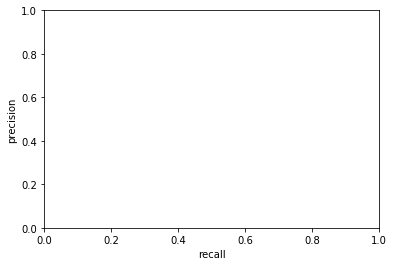

In [121]:
tresholds = [2.5, 3.0, 3.5, 4.0, 4.5]

def plot_precision_recall(prediction, tresholds):
    recalls = []
    precisons = []
    for treshold in tresholds:
        confusion = get_confusion(prediction, treshold)
        precisons.append(precision(confusion))
        recalls.append(recall(confusion))
    
    plt.plot(recalls, precisons)
    for r, p, t in zip(recalls, precisons, tresholds):
        plt.text(r, p, t)
        


plt.xlabel('recall')
plt.ylabel('precision')        

plot_precision_recall(predicted_item_based_cosine, tresholds)        
plot_precision_recall(predicted_item_based_euclidean, tresholds)
plot_precision_recall(predicted_item_based_I, tresholds) 
plot_precision_recall(predicted_item_based_II, tresholds)